In [1]:
from FireBotMAP import Map_generator
import numpy as np
import matplotlib.pyplot as plt
import yaml
from PIL import Image
from FireBot_path_optimizer import WayPointOptimizer

import csv
import os

In [2]:
root_dir = "/home/skachavarapu/home/Research_Track/house_ipa_results"

In [3]:
pgm_filename ="/home/skachavarapu/home/Research_Track/house_ipa_results/map/map.pgm"
yaml_filename = "/home/skachavarapu/home/Research_Track/house_ipa_results/map/map.yaml"
map_generator = Map_generator()
grid = map_generator.load_pgm(pgm_filename)

yaml_data = map_generator.load_yaml(yaml_filename)

In [4]:
def fov(grid_map, start_pos, radius, fov_angle=90):
        base_angles = [0, 180, 270, 90]  # Angles for N, S, W, E
        best_grid = None
        max_area = 0
        best_angle = None

        for base_angle in base_angles:
            grid = np.copy(grid_map)
            angles = np.deg2rad(np.linspace(base_angle - fov_angle / 2, base_angle + fov_angle / 2, num=400))
            y_start, x_start = start_pos  # Start position interpreted as (y, x)

            for angle in angles:
                for r in range(1, radius + 1):
                    x = int(x_start + r * np.cos(angle))
                    y = int(y_start + r * np.sin(angle))
                    if 0 <= x < grid.shape[1] and 0 <= y < grid.shape[0]:
                        if grid[y, x] == 0:  # Occupied, block visibility
                            break
                        elif grid[y, x] == 254:  # Unoccupied, update to visible
                            grid[y, x] = 150
                    else:
                        break

            explored_area = np.sum(grid == 150)
            if explored_area > max_area:
                max_area = explored_area
                best_grid = grid
                best_angle = base_angle

        return best_grid, best_angle
           
def find_frontier_cells( grid_map, explored_value, unexplored_value):
    
    rows, cols = grid_map.shape
 
    frontier_cells = []

    for i in range(rows):
        for j in range(cols):

            if grid_map[i, j] == unexplored_value:

                if ((i > 0 and grid_map[i-1, j] == explored_value) or
                    (i < rows - 1 and grid_map[i+1, j] == explored_value) or
                    (j > 0 and grid_map[i, j-1] == explored_value) or
                    (j < cols - 1 and grid_map[i, j+1] == explored_value)):

                    frontier_cells.append((i, j))

    return frontier_cells

In [5]:
ls

area.pgm                          iterations/
area.png                          latest_results/
a_star.py                         latest_results1/
environment.yml                   latest_results_3/
experiments/                      Multi_Processing.py
FireBotMAP.py                     path_generator.py
FireBot_path_optimizer_1.py       plots.py
FireBot_path_optimizer.py         __pycache__/
FireBot_Planner.py                revisit_time.py
FireBotScoutFov.py                Surveillance_gpu.py
FireBotScout_GPU.py               Surveillance.py
FireBotScout_Multi_Processing.py  Untitled.ipynb
FireBotScout.py                   warehouse/
FIRE_GPU.py                       wp_candidates/
Fov.py


Frontier cells: [(181, 275), (182, 274), (182, 276), (183, 273), (183, 277), (184, 272), (184, 278), (185, 271), (185, 279), (186, 270), (186, 280), (187, 269), (187, 280), (188, 268), (188, 281), (189, 267), (189, 282), (190, 266), (190, 283), (191, 265), (191, 283), (192, 264), (192, 284), (193, 263), (193, 284), (194, 262), (194, 285), (195, 261), (195, 285), (196, 260), (196, 286), (197, 259), (197, 286), (198, 258), (198, 287), (199, 257), (199, 287), (200, 256), (200, 287), (201, 255), (201, 288), (202, 254), (202, 288), (203, 253), (203, 288), (204, 252), (204, 289), (205, 251), (205, 289), (206, 250), (206, 289), (207, 249), (207, 289), (208, 248), (208, 290), (209, 247), (209, 290), (210, 246), (210, 290), (211, 245), (211, 290), (212, 244), (212, 290), (213, 243), (213, 290), (214, 242), (214, 290), (215, 241), (215, 290), (216, 240), (216, 290), (217, 239), (217, 290), (218, 239), (218, 290), (219, 240), (219, 290), (220, 241), (220, 290), (221, 242), (221, 290), (222, 243),

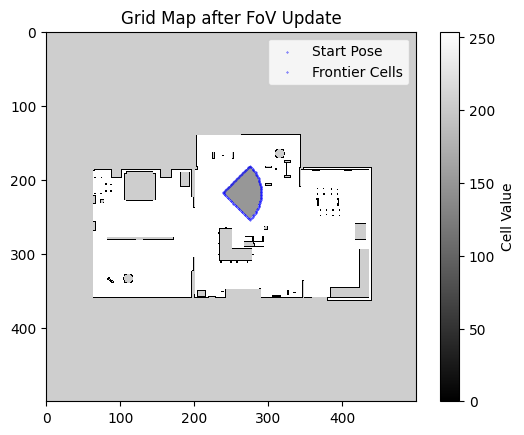

In [11]:
radius = 50
start_pos = (218, 240) 
explored_value = 150  
unexplored_value = 254  

# Update the FoV in the grid map
grid_map , angle = fov(grid, start_pos, radius)
 
frontier_cells = find_frontier_cells(grid_map, explored_value, unexplored_value)
print("Frontier cells:", frontier_cells)

print (angle)
#grid_map= np.where(grid_map == explored_value, 1, 0)
plt.imshow(grid_map, cmap='gray', interpolation='nearest')
plt.colorbar(label='Cell Value')
plt.scatter(start_pos[1], start_pos[0], color='blue',s=0.1, marker='o', label='Start Pose')
frontier_x, frontier_y = zip(*frontier_cells)
plt.scatter(frontier_y, frontier_x, color='blue', marker='o',s=0.1, label='Frontier Cells')
plt.title('Grid Map after FoV Update')

plt.legend()
#plt.savefig('wp_candidates/first_fov_region')
plt.show()

In [19]:
grid_map1 = np.copy(grid_map)

Frontier cells: [(148, 277), (148, 278), (148, 279), (148, 280), (148, 281), (148, 282), (148, 283), (148, 284), (148, 285), (148, 286), (148, 287), (148, 288), (148, 289), (148, 290), (148, 291), (148, 292), (148, 293), (148, 294), (148, 295), (148, 296), (149, 273), (149, 274), (149, 275), (149, 276), (149, 297), (149, 298), (149, 299), (149, 300), (150, 270), (150, 271), (150, 272), (150, 301), (150, 302), (150, 303), (151, 267), (151, 268), (151, 269), (151, 304), (151, 305), (151, 306), (152, 265), (152, 266), (152, 307), (152, 308), (153, 263), (153, 264), (153, 309), (153, 310), (154, 261), (154, 262), (154, 311), (155, 259), (155, 260), (155, 311), (156, 258), (156, 310), (157, 257), (157, 310), (158, 255), (158, 256), (158, 309), (159, 254), (159, 309), (160, 253), (160, 308), (161, 252), (161, 308), (162, 252), (162, 307), (163, 306), (164, 306), (165, 305), (166, 305), (167, 254), (167, 304), (168, 255), (168, 304), (169, 256), (169, 304), (170, 257), (170, 303), (171, 258),

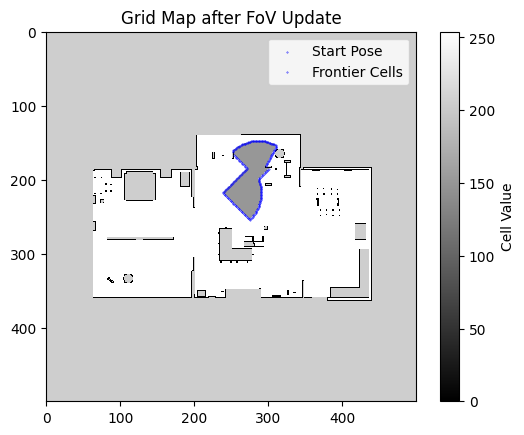

In [18]:
radius = 50
start_pos = (225, 290) 
explored_value = 150  
unexplored_value = 254  

# Update the FoV in the grid map
grid_map1 , angle = fov(grid_map1, start_pos, radius)
 
frontier_cells = find_frontier_cells(grid_map1, explored_value, unexplored_value)
print("Frontier cells:", frontier_cells)

print (angle)
#grid_map= np.where(grid_map == explored_value, 1, 0)
plt.imshow(grid_map1, cmap='gray', interpolation='nearest')
plt.colorbar(label='Cell Value')
plt.scatter(start_pos[1], start_pos[0], color='blue',s=0.1, marker='o', label='Start Pose')
frontier_x, frontier_y = zip(*frontier_cells)
plt.scatter(frontier_y, frontier_x, color='blue', marker='o',s=0.1, label='Frontier Cells')
plt.title('Grid Map after FoV Update')

plt.legend()
plt.savefig('wp_candidates/first_fov_(22,287)_region')
plt.show()

In [16]:
def revisit_time_(linear_length, cumulative_rotation, linear_speed = 0.3, rotational_speed= 0.52):
    
    t_l = linear_length / linear_speed
    
    
    t_r = cumulative_rotation / rotational_speed
    
    
    t_t = t_l + t_r
    
    
    
    return t_t

In [7]:
def heuristic(a, b):
    """Calculate the Manhattan distance between two points."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(map_data, start, goal, free_space=[254]):
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # 4-way connectivity
    open_set = {start}
    came_from = {}
    
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    
    while open_set:
        current = min(open_set, key=lambda x: f_score.get(x, np.inf))
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)  # Optional: include start in path
            return path[::-1]  # Return reversed path
        
        open_set.remove(current)
        for dx, dy in neighbors:
            neighbor = (current[0] + dx, current[1] + dy)
            
            # Check if within bounds and navigable
            if 0 <= neighbor[0] < map_data.shape[0] and 0 <= neighbor[1] < map_data.shape[1]:
                if map_data[neighbor[0], neighbor[1]] not in free_space:
                    continue
                
                tentative_g_score = g_score[current] + 1  # Cost = 1 per step
                
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    open_set.add(neighbor)
    
    return [] 
    
def convert_pgm_to_binary_custom(image_array):
    """
    Convert a .pgm file to a binary .png file where value 254 is converted to white (255)
    and all other values to black (0).

    Parameters:
    - pgm_file_path: str, path to the .pgm file
    - png_file_path: str, path where the .png file will be saved
    """
    # Load the PGM file
   

    # Convert value 254 to white (255), and all other values to black (0)
    binary_image_array = np.where(image_array == 254, 255, 0).astype(np.uint8)

    # Convert the modified NumPy array back to an image
    binary_image = Image.fromarray(binary_image_array)    
    return binary_image
def rotate_array_90_degrees(array):
    # Rotate the array 90 degrees clockwise
    return np.rot90(array, 1) 
def flip_array_vertically(array):
    # Flip the array vertically
    return np.flipud(array)   


In [9]:
map_data = map_generator.load_pgm("/home/skachavarapu/home/Research_Track/house_ipa_results/map/map.pgm")
metadata = map_generator.load_yaml("/home/skachavarapu/home/Research_Track/house_ipa_results/map/map.yaml")
map_data = rotate_array_90_degrees(map_data)
map_data = flip_array_vertically(map_data)
print(np.unique(map_data))
resolution = metadata['resolution']
origin = metadata['origin'][:2]  # Only need x and y

[  0 205 254]


In [44]:
ipa_path = os.path.join(root_dir,'expl7/lab_ipa_results.txt')

In [45]:
with open(ipa_path, 'r') as file:
    # Read all lines from the file
    lines = file.readlines()

In [46]:
xy_list = []
z_list = []

# Process each line in the file
for line in lines:
    # Remove any extra whitespace and brackets, then split by commas
    parts = line.strip().strip('[]').split(',')

    # Ensure the line has exactly 3 components (x, y, z)
    if len(parts) == 3:
        try:
            # Convert the strings to float and separate into xy and z
            x, y, z = float(parts[0]), float(parts[1]), float(parts[2])
            xy_list.append([x, y])
            z_list.append(z)
        except ValueError:
            print(f"Skipping line due to conversion error: {line}")
  

In [47]:
goals = [(int(x), int(y)) for x, y in xy_list]

In [48]:
optimized_goals = WayPointOptimizer(goals, 0.3, 5)
best_path = optimized_goals.run()

print(best_path)

[(321, 208), (327, 219), (321, 226), (315, 233), (325, 235), (331, 240), (321, 246), (311, 255), (300, 249), (305, 256), (307, 262), (312, 265), (302, 274), (299, 279), (301, 285), (287, 297), (289, 299), (297, 297), (305, 294), (311, 284), (327, 283), (322, 293), (320, 317), (339, 310), (350, 310), (343, 322), (336, 321), (334, 328), (339, 331), (339, 335), (339, 336), (331, 341), (322, 340), (323, 333), (320, 336), (310, 337), (308, 320), (313, 309), (302, 312), (299, 312), (285, 310), (275, 318), (273, 318), (260, 319), (256, 322), (246, 321), (253, 341), (278, 332), (285, 326), (290, 322), (291, 335), (305, 344), (306, 350), (309, 349), (312, 347), (317, 348), (328, 343), (337, 344), (337, 344), (339, 342), (357, 342), (357, 347), (367, 350), (370, 342), (377, 339), (389, 336), (394, 335), (414, 325), (402, 313), (393, 324), (378, 332), (366, 333), (356, 334), (351, 328), (354, 324), (359, 310), (379, 313), (389, 310), (396, 306), (387, 299), (390, 292), (372, 293), (367, 297), (36

path_length 283.74999999999983,cummulative rotations 574, revisit_time 2049.6794871794864


/tmp/ipykernel_3903701/3846368088.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


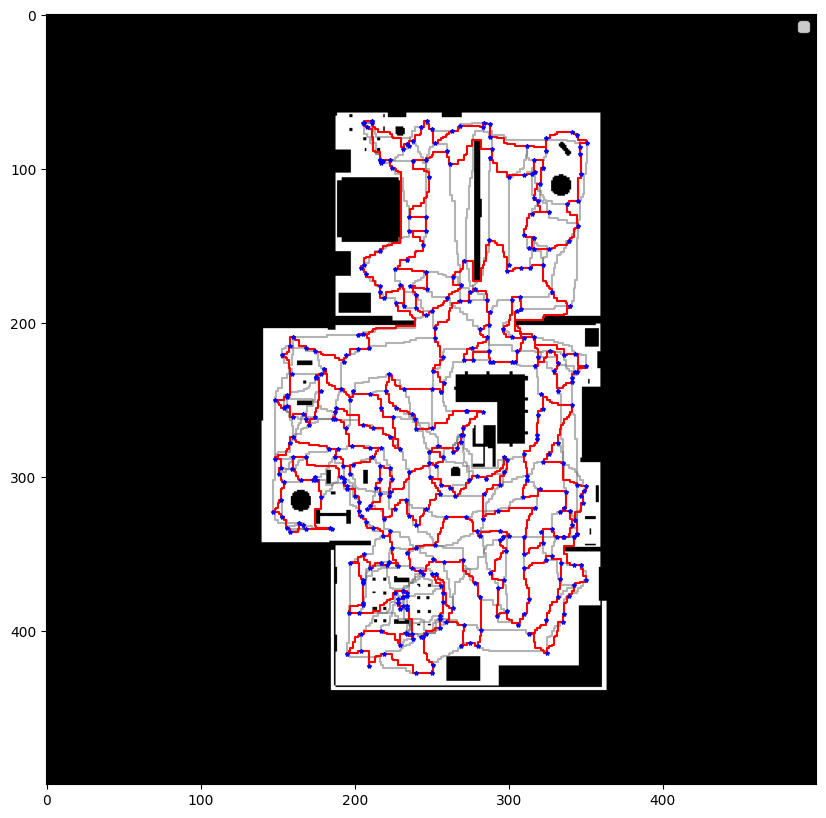

In [49]:
before_wpo = True
after_wpo = True
goals1 = best_path
total_path_length = 0
total_path_length1 = 0
fig, ax = plt.subplots(figsize=(10, 10))
b_map = convert_pgm_to_binary_custom(map_data)
cummulative_rotation = 574
#area_map = load_pgm('area.pgm')
ax.imshow(b_map, cmap='gray')
grid1 = np.copy(map_data)
grid2= np.copy(map_data)

if before_wpo:
    for i in range(len(goals) - 1):
        path = a_star(grid1, goals[i], goals[i+1])
        if path:
            
            total_path_length += len(path) * resolution
            
            y, x = zip(*path)
            ax.plot(x, y, color='dimgray', alpha = 0.5)  
if after_wpo:
    for i in range(len(goals1) - 1):
        path1 = a_star(grid2, goals1[i], goals1[i+1])
        if path1:
            
            total_path_length1 += len(path1) * resolution
            
            y1, x1 = zip(*path1)
            ax.plot(x1, y1, color='r')


# Plotting goals
for goal in goals:
    ax.plot(goal[1], goal[0], 'b*', markersize=3)
 
t_t = revisit_time_(total_path_length1, cummulative_rotation, linear_speed = 0.3, rotational_speed= 0.52)
print(f'path_length {total_path_length1},cummulative rotations {cummulative_rotation}, revisit_time {t_t}')
metrics = ['path_length',total_path_length1,'cummulative rotations',cummulative_rotation, 'revisit_time' ,t_t]
csv_file = 'latest_results_3/ipa/ipa_Counter_line.csv'
with open(csv_file,'w',newline = '') as file:
    writer = csv.writer(file)
    writer.writerow(metrics)
plt.legend()
plt.savefig('latest_results_3/ipa/ipa_Counter_line.png', dpi=200) 
plt.show()
